<a href="https://colab.research.google.com/github/Ardaolmez/Neuroscience-Projects/blob/main/Generated%20Artificial%20Spike" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise you learn how to analyze neuronal spike train data.
The data you work on are artificially generated spike trains, simulating an electro-neurophysiology experiment.
Below are descriptions of the experiment and the data format, which are necessary to load the data into your program properly.

## Virtual experiment

### Experimental setup

![](images/virtual_setup.png)

* Multi-electrode array recording in the primary visual cortex (V1)
* Extracellular spiking activities of 20 neurons were simultaneously recorded
* Subject kept gaze at the fixation cross in the center of the screen
* Visual stimuli (orientation bars) were presented within the receptive field of the recorded neurons

### Stimulation protocol

![](images/stim_protocol.png)
* One recording session consisted of 120 trials
    - Each trial was of 500 ms duration
    - Stimulus onset: 200 ms after the beginning of a trial
    - Stimulus offset: 400 ms (i.e., stimulus duration is 200 ms)
* 4 different stimulus types
    - Stimulus type IDs 0, 1, 2, and 3 for bar stimuli of orientations 0, 45, 90, and 135 degrees, respectively
    - Presented in a random order

### Data format

* Data are saved in .npy format (i.e. the standard file format to save numpy arrays)
* **spikes.npy** contains spike times (in the unit of second) of 20 simultaneously-recorded neurons
* **stim_on.npy** contains the time stamps (in the unit of second) of the onsets of stimulus presentations, separately for each of the 4 stimulus types

## Task 0: Data Loading

The first step of any data analysis is to load data from data files into your program.
In this exercise, as described above, data files are provided in .npy format.
You can load the contents of .npy files using a NumPy function **numpy.load()** as follows (assuming the data files are located in [current directory]/data):

In [1]:
import numpy as np

spikes = np.load("/content/spikes.npy", encoding='bytes', allow_pickle=True)
stim_on = np.load("/content/stim_on.npy", encoding='bytes', allow_pickle=True)

<ipython-input-1-7d8dc2e20b5e>:3: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  spikes = np.load("/content/spikes.npy", encoding='bytes', allow_pickle=True)
<ipython-input-1-7d8dc2e20b5e>:4: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  stim_on = np.load("/content/stim_on.npy", encoding='bytes', allow_pickle=True)


* **Task 0a**: check the shape of the arrays `spikes` and `stim_on`. Print out the contents of the arrays and guess which array dimension corresponds to what attribute of data.

In [2]:



print(spikes.shape[0])

print(stim_on.shape[0])




print(spikes[0])

print(stim_on[0])

20
4
[ 0.063  0.066  0.07  ... 59.61  59.783 59.925]
[ 9.2 12.2 13.7 14.7 15.7 16.7 20.2 20.7 21.7 22.2 24.2 25.7 28.2 31.7
 32.2 35.2 36.2 37.2 39.2 41.2 43.2 44.2 44.7 51.7 52.2 54.2 55.2 55.7
 57.2 59.2]


The array `spikes` contains spike trains of 20 neurons. The spike times of the first neuron (referred to as unit 0 hereafter) are stored in spikes[0], those of the second neuron (likewise, unit 1) in spikes[1], and so on.

The array `stim_on` contains the time stamps of the onsets of the 4 types of stimuli, which can be accessed by stim_on[0] for the stimulus type 0, stim_on[1] for the stimulus type 1, and so on.


* **Task 0b**: how many spikes were recorded from each neuron? How many times was each type of stimulus presented?

In [3]:
# ===== code for Task 0b =====
for i, ts_spk in enumerate(spikes):
    print("Unit {0}: {1} spikes".format(i, ts_spk.shape[0]))
for i, ts_on in enumerate(stim_on):
    print("Stimulus {0}: presented {1} times".format(i, ts_on.shape[0]))

Unit 0: 1896 spikes
Unit 1: 1581 spikes
Unit 2: 1638 spikes
Unit 3: 1768 spikes
Unit 4: 1896 spikes
Unit 5: 1581 spikes
Unit 6: 1581 spikes
Unit 7: 1896 spikes
Unit 8: 1896 spikes
Unit 9: 1896 spikes
Unit 10: 1581 spikes
Unit 11: 1581 spikes
Unit 12: 1638 spikes
Unit 13: 1638 spikes
Unit 14: 1768 spikes
Unit 15: 1768 spikes
Unit 16: 1768 spikes
Unit 17: 1638 spikes
Unit 18: 1768 spikes
Unit 19: 1768 spikes
Stimulus 0: presented 30 times
Stimulus 1: presented 30 times
Stimulus 2: presented 30 times
Stimulus 3: presented 30 times


## Task 1: Dot Display

The next task is to plot the spike data in a form of dot display.
In the standard dot display, the horizontal axis represents time, and the vertical axis indexes units (when plotting spike trains of multiple units in a single trial) or trials (when plotting spike trains of a single unit in multiple trials).
Each spike is represented by a short vertical line ('tick') located at the corresponding time position and unit (or trial) index.

### Plot of the entire recording

Let’s first plot a spike train of a single unit. You can do this using **matplotlib.pyplot.plot()** as follows:

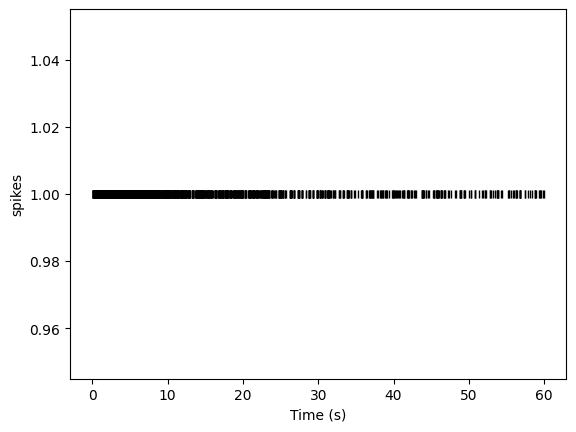

In [4]:
import matplotlib.pyplot as plt

#%matplotlib

x = spikes[0]
y = np.ones_like(x)
plt.plot(x, y, 'k|')    # plot data points with black ticks
plt.xlabel("Time (s)")
plt.ylabel("spikes")
plt.show()
# set axes labels


Note that, in addition to array `x` that contains spike times, you also need to create array `y` that contains the vertical position of (each and every) spikes in the plot. In this case it can be an arbitrary number, so it's set to 1 and generated by **numpy.ones_like()**, a function which returns an array of ones that has the same shape as  the array given as the argument.

* **Task 1a**: plot spike trains of all units together in one plot. Note that you need to specify different vertical positions for different units. (1 point)

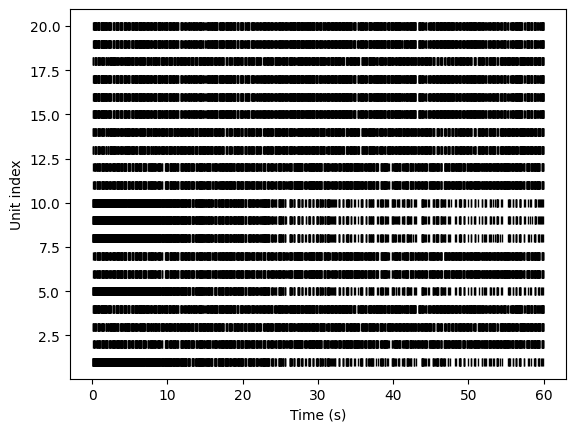

In [5]:
# ===== code for Task 1a =====

def dotdisplay(spikes):
    for i, spk in enumerate(spikes):
        x = spk
        y = np.ones_like(x)*(i+1)
        plt.plot(x, y, 'k|')
    plt.xlabel("Time (s)")
    plt.ylabel("Unit index")

dotdisplay(spikes)
plt.show()



Now you see how the spiking activities of single units were modulated over time. The cause of these modulations should be the visual stimulation. To relate the spiking activities to stimulus presentation, it would be nice to have certain markers in the plot that indicate the timings of stimulation. You can use **matplotlib.pyplot.axvline()** for this as follows:

    for t_on in stim_on[0]:
        plt.axvline(t_on)

* **Taks 1b**: draw stimulus onset markers (for all stimulus types) on top of the dot display. Explore the plot by zooming in/out and panning across time/units (use the interactive functions of the plot window) and visually inspect how units respond to stimulation. (1 point)

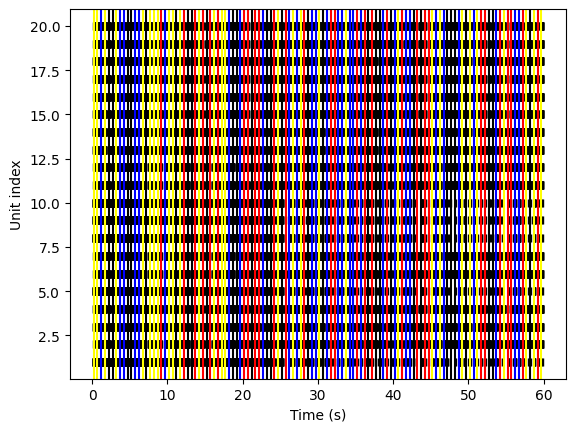

In [7]:
# ===== code for Task 1b =====

def draw_marker(stim_on, stim_id):
    # Define a color cycle
    set_color_cycle = ['red', 'black', 'yellow', 'blue']
    # Loop through each time in the specified stimulus onset list and plot vertical lines
    for t in stim_on[stim_id]:
        plt.axvline(t, color=set_color_cycle[stim_id])

dotdisplay(spikes)
for stim_id in range(len(stim_on)):
        draw_marker(stim_on, stim_id)

# set axis labels
plt.xlabel("Time (s)")
plt.ylabel("Unit index")
plt.show()

### Plot of spike trains segmented into trials

A more sophisticated way of illustrating neuronal responses to stimulus presentation is to plot, separately for each unit, segments of spike trains aligned to the timing of stimulus presentation.
To draw this type of dot display, you need to cut out time-aligned segments from the original spike train.
A convenient way to do such segmentation in NumPy is to use the advanced indexing as follows:

    ts_spk = spikes[0]    # spike train of the 0-th unit
    t_on = stim_on[0][0]    # the 0-th onset time of stimulus 0
    ts_spk_trial = ts_spk[(t_on - 0.2 < ts_spk) & (ts_spk < t_on + 0.3)] - t_on

The indexing `ts_spk[(t_on - 0.2 < ts_spk) & (ts_spk < t_on + 0.3)]` in the last line picks up the elements of `ts_spk` that satisfy the conditions given in the square brackets.
The conditions here are whether a spike time (i.e. an element of `ts_spk`) is between -0.2 sec (i.e. trial start) and 0.3 sec (i.e. trial end) from `t_on` (i.e. a stimulus onset).
Note that `t_on` is subtracted from the spike times, so that `ts_spk_trial` stores the spike times **relative to the stimulus-onset time**.

Let’s use this indexing to implement a function, say `segment_spike_train()`, that cuts out segments from a given spike train around a given set of stimulus-onset times.


* **Taks 1c**: complete the function `segment_spike_train()` below by filling the block indicated by "TO BE IMPLEMENTED". (1.5 points)

In [8]:
# ===== code for Task 1c =====

def segment_spike_train(ts_spk, trig, t_pre, t_post):
    '''
    Segment a given spike train around a given set of trigger times.

    Arguments
    ---------
    ts_spk : a list or array containing spike times
    trig : a list or array containing trigger times for segmentation
    t_pre : start time of a segment relative to trigger time
    t_post : end time of a segment relative to trigger time

    Returns
    -------
    segments : a list containing segments cut out from the spike train
               around the trigger times
    '''
    segments = []

    for t_trig in trig:
        ts_spk_trial = ts_spk[(t_trig - t_pre < ts_spk) & (ts_spk < t_trig + t_post)] -t_trig
        segments.append(ts_spk_trial)

    return segments

* **Taks 1d**: Use the function `segment_spike_train()` to draw dot displays of trial-segmented spike trains of units 1, 2 and 3. Make a separate dot display for each unit and for each of the 4 stimulus types (see the example below), so that the difference between the responses to different stimulus types can be seen at a glance. (2 points)

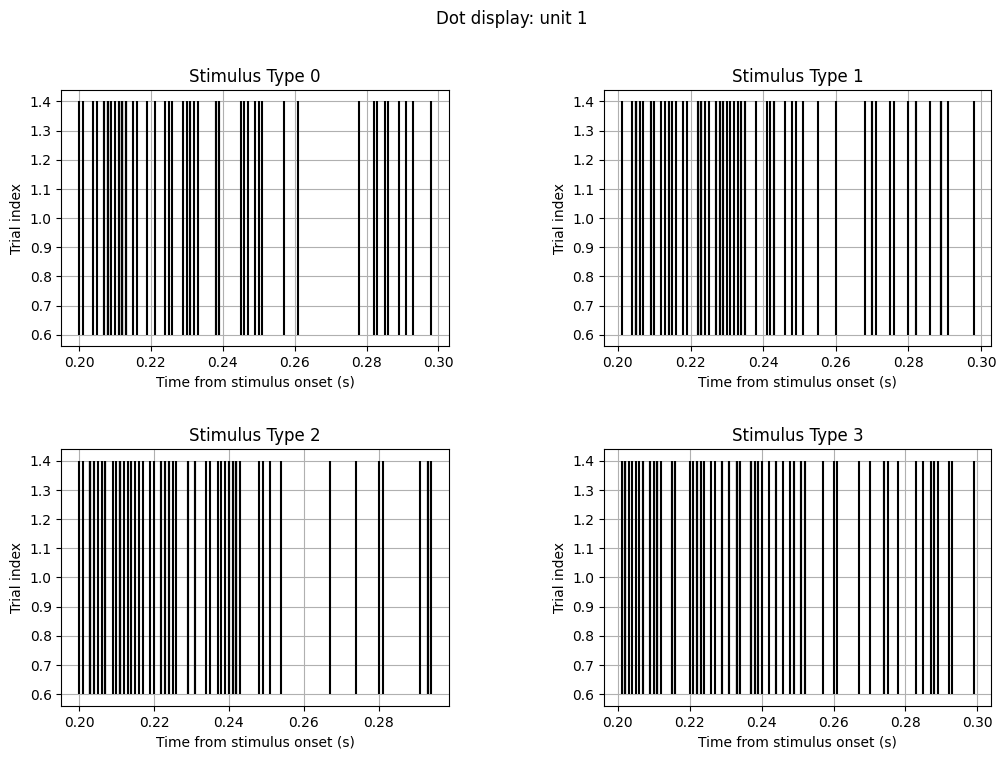

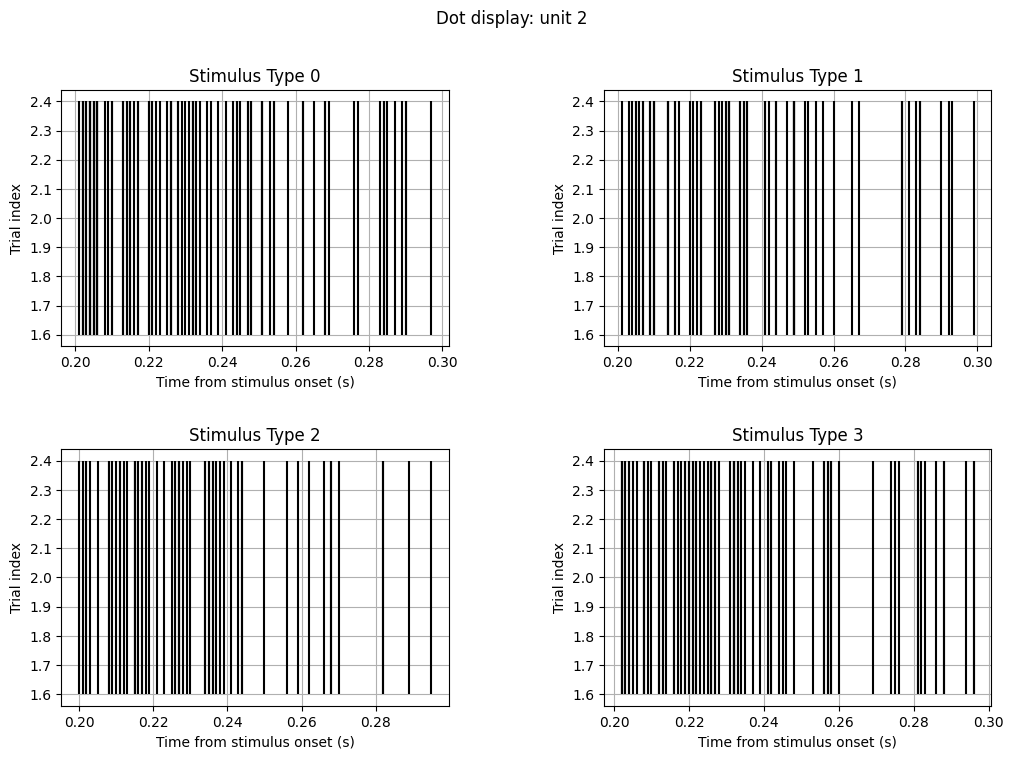

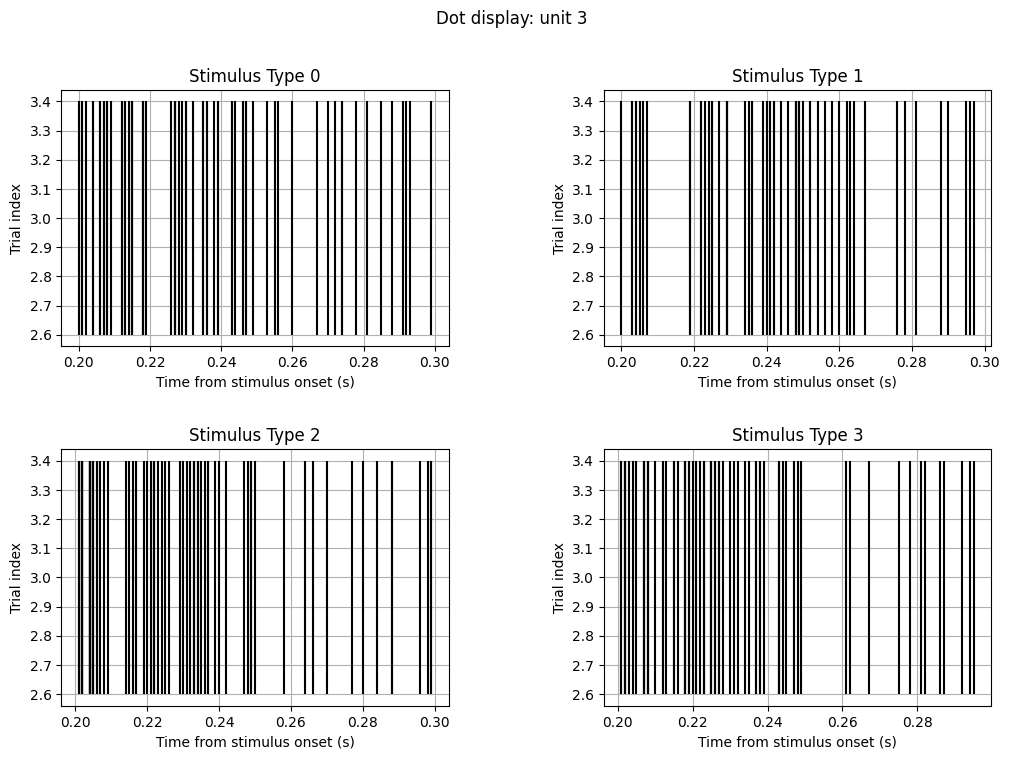

In [13]:

# Set parameter values
t_start = -0.2
t_end = 0.3

unitID = 1  # Change this to make plots for different units
for unitID in range(1, 4):  # Assuming there are 3 units
    # Create a new figure for each unit
    plt.figure(figsize=(12, 8))

    # Cut out spike train segments and draw a dot display for each stimulus type
    for stimID in range(len(stim_on)):
        spikes_trial = segment_spike_train(spikes[unitID], stim_on[stimID], t_start, t_end)

        plt.subplot(2, 2, stimID + 1)
        for trial in spikes_trial:
            plt.vlines(trial, unitID - 0.4, unitID + 0.4, color='black')

        plt.xlabel("Time from stimulus onset (s)")
        plt.ylabel("Trial index")
        plt.title(f"Stimulus Type {stimID}")
        plt.grid(True)

    plt.suptitle(f"Dot display: unit {unitID}")
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.show()


Below is a sample of the trial-segmented dot displays, generated from the spike train of unit 0.
You can infer from these plots that this neuron prefers (i.e., responds with more spikes) stimulus type 2 than other stimulus types (stimulus type 0 is particularly non-preferred), and that its spiking activity was non-stationary in the sense that it became weaker in later trials (could be due to the change of physiological condition of the neuron and/or experimental flaw such as unintended movement of the recording electrode).

![](images/trial-segmented_dot_display.png)

* **Task 1e**: examine the plots you generated in **Task 1d** and discuss what aspect of the response activity reflects the difference of stimulus type. (0.5 point)

**Results of Task 1e discussion:**
I don't see any big difference,but because of V1 neurons respond strongly to bar stimuli in a particular orientation and in our stimulus have different orientation,it effects response activity of different stimulus.


## Task 2: Peri-stimulus Time Histogram

The final task of this part of exercise is to draw a peri-stimulus time histogram (PSTH) of a spike train.
PSTH is a histogram of spike counts, averaged across trials, around the time of a certain experimental event (typically stimulus-onset).

As a pre-processing for calculation of PSTH, binning of spike train, i.e., counting the numbers of spikes within pre-defined temporal bins, is necessary.

Let’s first implement a function for binning of a spike train. A binning function should take as its arguments the following:
* a spike train
* a bin width value
* a bin step value (i.e. the interval between neighboring bins)
* starting- and stopping-time points of binning

As outputs, the function should return an array containing the number of spikes within the defined bins, and an array containing the temporal positions of the bins.

* **Task 2a:** complete the function `bin_spike_train()` below by filling the block indicated by "TO BE IMPLEMENTED". (1.5 points)

In [14]:
# ===== code for Task 2a =====

def bin_spike_train(spk, bin_width, bin_step, t_start, t_stop):
    '''
    bin a given spike train with given binning paramters

    Arguments
    ---------
    spk : a list or array containing spike times
    bin_width : temporal width of a bin
    bin_step : interval between neighboring bins
    t_start, t_stop: starting and stopping time points of binning

    Returns
    -------
    spike_counts : an array containing spike counts of each bin
    bin_pos : temporal positions of (the center of) bins
    '''
    # define bins
    bin_left = np.arange(t_start, t_stop - bin_width, bin_step)
    bin_right = bin_left + bin_width
    num_bin = bin_left.size

    # count spikes that fall within each bin
    spike_counts = np.empty(num_bin)
    for i in range(num_bin):
        spikes_in_bin = spk[(bin_left[i] < spk) & (spk < bin_right[i])]
        spike_counts[i]=len(spikes_in_bin)

        #

    bin_pos = bin_left + bin_width / 2

    return spike_counts, bin_pos

Once you have this function working, you can easily compute a PSTH, by applying the function to the trial-segmented spike trains that the function `segment_spike_train()` generates, and taking the mean of spike counts across trials in a bin-wise manner.
Note that, if you want the result in the unit of spikes/sec rather than spikes per bin, you need to convert the units by dividing the result by the bin width.

* **Task 2b**: Draw PSTHs of the spike trains of units 1, 2 and 3 (use bin width of 0.01 sec and bin step of 0.002 sec) using the functions `segment_spike_train()` and `bin_spike_train()`. Compute a separate PSTH for each unit and for each of the 4 stimulus types. Compare the results with the dot displays you generated in **Task 1d**, and discuss how features of the response activity seen in the dot displays are reflected in the shapes of PSTH graphs. (2.5 points)

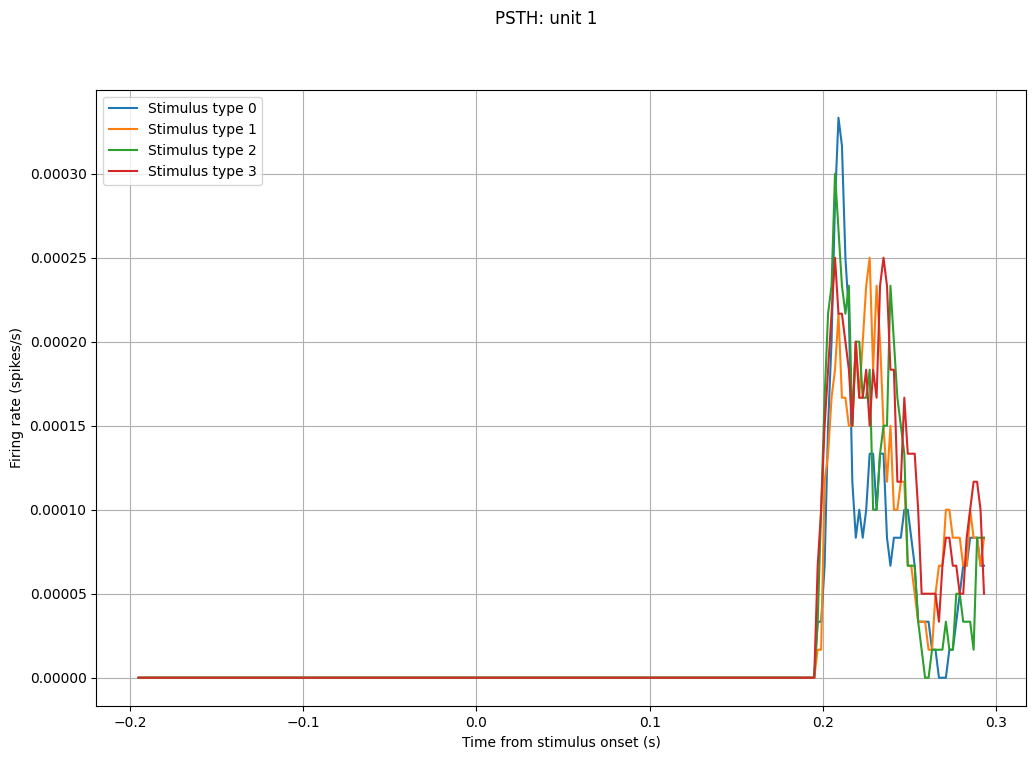

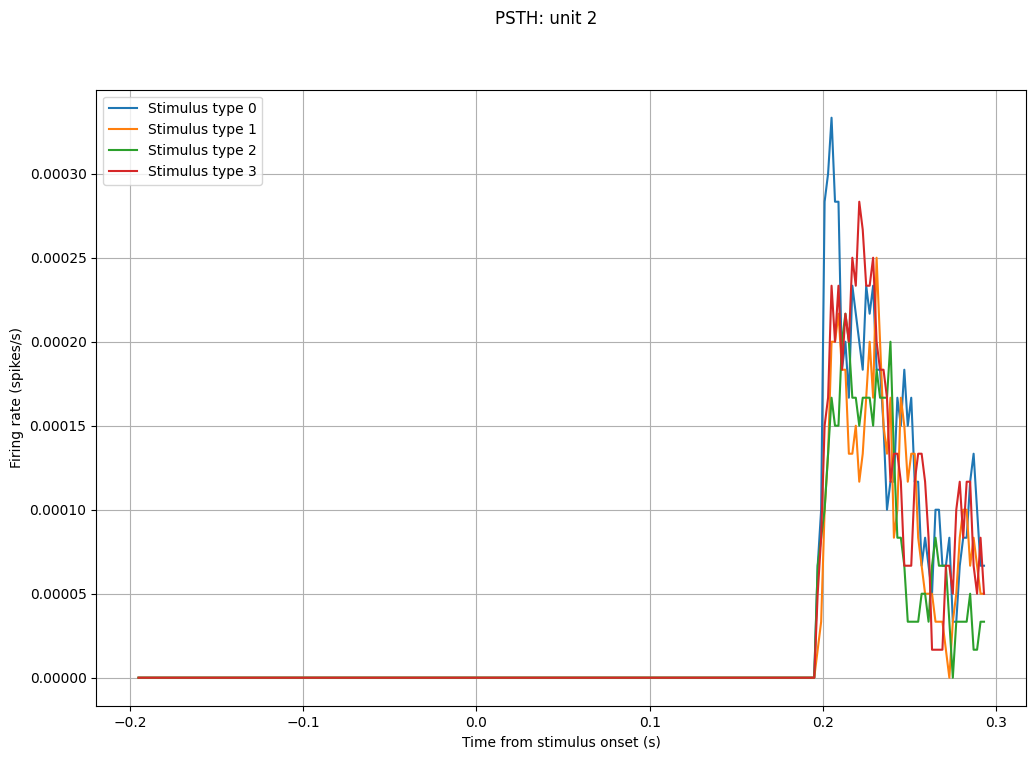

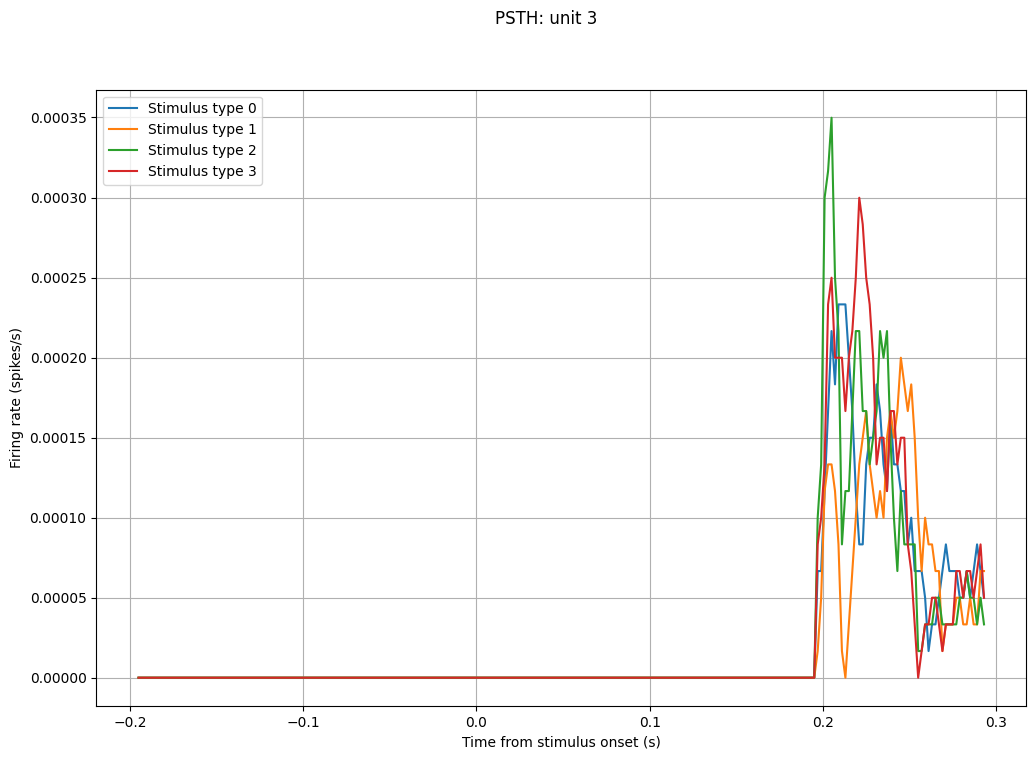

In [17]:
# ===== code for Task 2b =====

def comp_psth(spikes, trig, bin_width, bin_step, t_start, t_stop):
    # segment spike trains
    spikes_trial = segment_spike_train(spikes, trig, t_start, t_stop)

    # bin eash spike train segment
    spike_count_buff = []
    for spk in spikes_trial:
        spike_counts, bin_p=bin_spike_train(spk,bin_width,bin_step,t_start,t_stop)
        spike_count_buff.append(spike_counts)



    bin_left = np.arange(t_start, t_stop - bin_width, bin_step)
    bin_pos= bin_left + bin_width / 2
    psth=np.zeros(len(spike_count_buff[0]))
    for i in range(len(spike_count_buff)):
        for j in range(len(spike_count_buff[i])):
            psth[j]=+psth[j]+spike_count_buff[i][j]
    psth=psth/(len(bin_pos)*len(psth))

    return psth, bin_pos


# Set parameter values
bin_width = 0.010
bin_step = 0.002
t_start = -0.2
t_stop = 0.3

unitID = 1  # Change this to make plots for different units
for unitID in range(1, 4):  # Assuming there are 3 units
    plt.figure(figsize=(12, 8))
    # Compute and plot a PSTH for each stimulus type
    for stimID in range(4):
        psth, bin_pos = comp_psth(spikes[unitID], stim_on[stimID], bin_width, bin_step, t_start, t_stop)
        plt.plot(bin_pos, psth, label="Stimulus type {0}".format(stimID))

    # Decorate the plot
    plt.grid()
    plt.xlabel("Time from stimulus onset (s)")
    plt.ylabel("Firing rate (spikes/s)")
    plt.legend(loc='upper left')
    plt.suptitle("PSTH: unit {0}".format(unitID))
    plt.show()


**Results of Task 2b discussion:**
The observed neurons response definitely but not immediately.After 0.2 second neurons start to response each stimulis and reach the maximum spike frequence shortly after.The response rate fall exponentially at reach to bottom like 0.27 second.At the end we have also some spikes but they are not high frequence as maximum level.Another interesting aspect to observe,neurons don't have any spikes before stimulus.It is kind a proof that,stimulus effects neurons and their response.
There isn't any significant difference between neuron responses against four stimulus.V1 neurons respond strongly to bar stimuli in a particular orientation and in our stimulus have different orientation,it can effects response activity of different stimulus in our three units.